# Mathematical pendulum

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import sin
from scipy.integrate import solve_ivp
from scipy.special import ellipk

### Equations of motion

$$
\mathcal{H} = \dfrac{1}{2}p^2 + 2 \sin^2 \dfrac{\theta}{2}
$$

$$
\begin{matrix}
\dot{\theta} & = & p \\
\dot{p} & = & - \sin\theta
\end{matrix}
$$

In [49]:
def dfunc(t, x):
    res = np.zeros_like(x)
    res[0] = x[1]
    res[1] = -sin(x[0]) 
    return res

### Initial conditions

In [50]:
theta_0 = np.radians(90)
p_0 = 0

### Period of librations

$$
T = 4 \mathrm{K} \bigg( \sqrt{\dfrac{\mathcal{E}_0}{2}} \bigg)
$$

In [51]:
N = 120
E_0 = p_0**2/2 + 2*sin(theta_0/2)**2
annotation = "E = {}".format(E_0.round(4))
t_max = 4*ellipk(E_0/2)
dt = t_max/N
t = np.arange(0, t_max, dt)

### Numerical solution

In [52]:
sol = solve_ivp(dfunc, t[[0, -1]], [theta_0, p_0], method="Radau", t_eval=t)

Text(-1.6278431093334065, 1.505819769783152, 'E = 1.0')

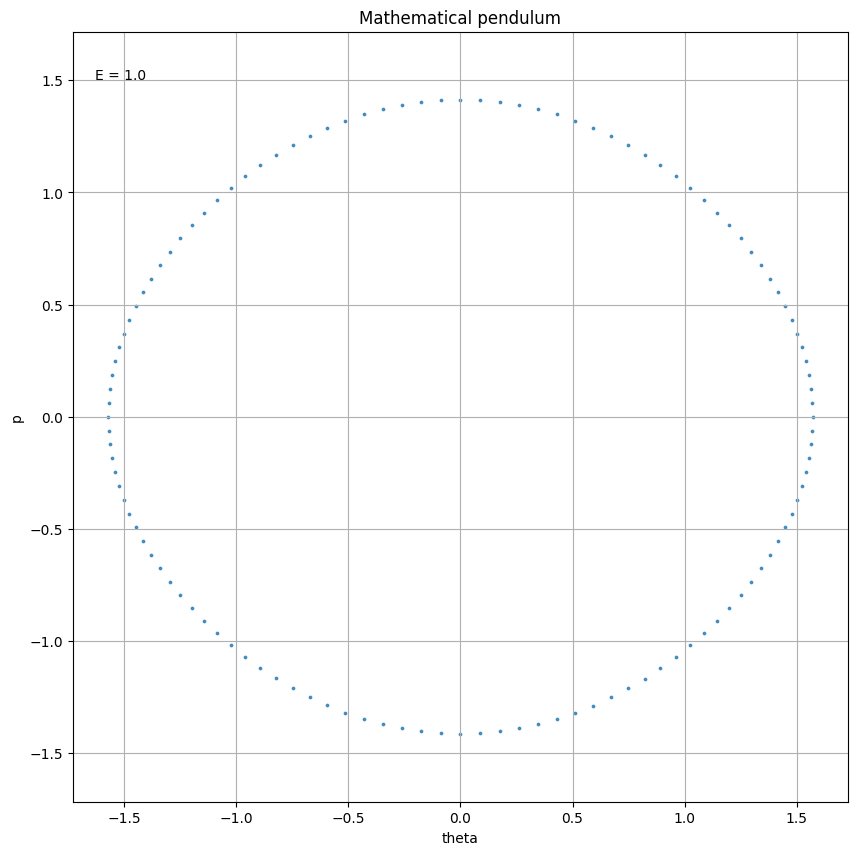

In [53]:
plt.figure(figsize=(10, 10))
plt.axis()
plt.title("Mathematical pendulum")
plt.axis("equal")
plt.xlabel("theta")
plt.ylabel("p")
plt.grid(True)
plt.scatter(sol.y[0], sol.y[1], s=3, alpha=0.75)
xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmin + 0.1, ymax - 0.05, annotation)